In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ufo = pd.read_json('../data/ufodata.json.zip', lines=True, chunksize = 10000)

In [8]:
chunk_list = []

for chunk in ufo:  
    chunk_list.append(chunk)

ufo_concat = pd.concat(chunk_list)


ValueError: I/O operation on closed file.

In [11]:

ufo_concat.head()

,_id,url,html,time
20000,{'$oid': '59145c667c40e840c1242e0e'},http://www.nuforc.org/webreports/110/S110910.h...,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",Thu May 11 12:43:18 2017
20001,{'$oid': '59145c687c40e840c1242e0f'},http://www.nuforc.org/webreports/110/S110742.h...,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",Thu May 11 12:43:20 2017
20002,{'$oid': '59145c6b7c40e840c1242e10'},http://www.nuforc.org/webreports/110/S110765.h...,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",Thu May 11 12:43:23 2017
20003,{'$oid': '59145c6e7c40e840c1242e11'},http://www.nuforc.org/webreports/110/S110764.h...,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",Thu May 11 12:43:26 2017
20004,{'$oid': '59145c707c40e840c1242e12'},http://www.nuforc.org/webreports/110/S110763.h...,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",Thu May 11 12:43:28 2017


In [13]:
ufo_html = ufo.html
ufo_html[0]

'<html xmlns:v="urn:schemas-microsoft-com:vml"\r\nxmlns:o="urn:schemas-microsoft-com:office:office"\r\nxmlns:w="urn:schemas-microsoft-com:office:word"\r\nxmlns:m="http://schemas.microsoft.com/office/2004/12/omml"\r\nxmlns="http://www.w3.org/TR/REC-html40">\r\n\r\n<head>\r\n<meta http-equiv=Content-Type content="text/html; charset=windows-1252">\r\n<meta name=ProgId content=Word.Document>\r\n<meta name=Generator content="Microsoft Word 15">\r\n<meta name=Originator content="Microsoft Word 15">\r\n<link rel=File-List href="STemplate_files/filelist.xml">\r\n<!--[if gte mso 9]><xml>\r\n <o:DocumentProperties>\r\n  <o:Author>Christian Stepien</o:Author>\r\n  <o:LastAuthor>Christian Stepien</o:LastAuthor>\r\n  <o:Revision>3</o:Revision>\r\n  <o:TotalTime>1</o:TotalTime>\r\n  <o:Created>2014-02-14T21:30:00Z</o:Created>\r\n  <o:LastSaved>2014-02-14T21:35:00Z</o:LastSaved>\r\n  <o:Pages>1</o:Pages>\r\n  <o:Words>58</o:Words>\r\n  <o:Characters>331</o:Characters>\r\n  <o:Lines>2</o:Lines>\r\n  <

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(ufo_html[0], 'html.parser')

In [16]:
table=soup.find('tbody')

In [35]:
import re
def data_pipeline(data):
    '''
    input: raw dataframe with html column

    '''

    contents = []
    for row in data.html:
        soup = BeautifulSoup(row, "html.parser")
        table = soup.find("tbody")
        text = table.text.strip()
        a = re.findall(r'(Duration.+?\n\n\n)(.+)(\(\(NUFORC Note:)?', text)
        try:
            contents.append(a[0][1])
        except:
            pass

    return contents

contents = data_pipeline(ufo)

In [37]:
data = pd.DataFrame(contents)

In [85]:
X = data[0]
X

0     Light seen over mountain's east of Camp McGreg...
1     Light in sky stationary.  Not a airplane or an...
2     Flying saucer descends, possibly lands in Nort...
3     While letting my dog out, a very bright white ...
4     A fire ball was moving in the atmosphere while...
                            ...                        
94    We got home from working the 2-10 shift at sec...
95    Brown saucer with red and green lights seen in...
96    There was a reflection on the window of a circ...
97    i was observing what I thought to be a large e...
98    TR3B Absolutely Certain!I saw the TR3B in the ...
Name: 0, Length: 99, dtype: object

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn import metrics

# removes punctuation and stopwords. replaces strings with lowercase and outputs top 1000 features. 
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', max_features = 100)

tfidf_ngrams = TfidfVectorizer(lowercase=True, stop_words='english', max_features = 1000, ngram_range=(1,2))

count_vec = TfidfVectorizer(lowercase=True, stop_words='english', max_features = 1000)

count_vec_ngrams = TfidfVectorizer(lowercase=True, stop_words='english', max_features = 1000, ngram_range=(1,2))

for transformers in [tfidf,tfidf_ngrams,count_vec,count_vec_ngrams]:
    transformers.fit(X)

X_tfidf = tfidf.transform(X).todense()
# .astype('U').todense()
# X_tfidf.todense()
X_tfidf

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.29266506, ..., 0.        , 0.        ,
         0.        ],
        [0.1357466 , 0.13897931, 0.11571841, ..., 0.        , 0.        ,
         0.25976398],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.3457907 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.23724485],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [101]:
def tfidf_KMeans(X):
    tfidf = TfidfVectorizer(lowercase=True, stop_words='english', max_features = 1000)
    X = tfidf.fit_transform(X)
    km = KMeans()
    km.fit(X)
    top_centroids = km.cluster_centers_.argsort()[:,-1:-11:-1]
    features = tfidf.get_feature_names()
    for num, centroid in enumerate(top_centroids):
        print(f"{num}, {', '.join(features[i] for i in centroid)}")
    

In [102]:
tfidf_KMeans(X)

0, formation, triangular, circle, lights, looks, facing, big, craft, horizon, neurotically
1, moon, moved, bright, time, looked, stars, round, light, yellowish, started
2, contact, anonymous, remain, source, provides, elects, information, report, nuforc, pd
3, object, light, bright, shaped, huge, craft, kept, noticed, saw, got
4, taft, date, witness, indicates, porch, brown, house, sighting, truck, california
5, ring, lights, advertising, eden, prairie, circle, casino, local, road, stationary
6, light, sky, lights, bright, like, moving, saw, just, looked, object
7, red, ufo, objects, saw, sky, left, straight, cloud, told, light


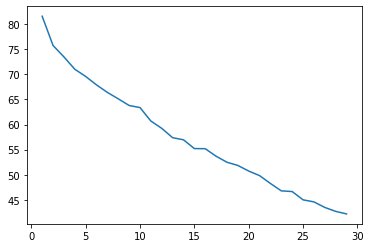

In [115]:
K = range(1,30)
fig,ax = plt.subplots()
inertia = []

for k in K:
    km = KMeans(k)
    km.fit(X_tfidf)
    inertia.append(km.inertia_)
    
    
ax.plot(K, inertia)